In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../hydro-requirement')
import hydrogen as h2

## MTD and UIUC fleet requirements

Description? 

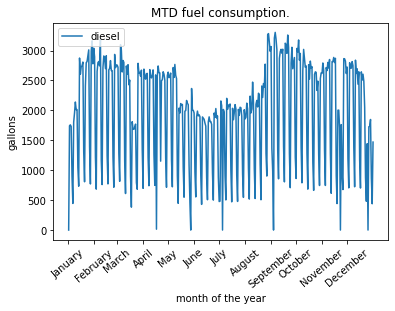

In [3]:
df = pd.read_csv('mtd.csv')
# This goes from 07/01/18 - 06/30/19
doy = df['day of the year'].tolist()
diesel = df['quantity (gallons)'].tolist()

ndoy = doy[::-1]
ndiesel = np.roll(diesel, 184)[::-1]
# This goes from 01/01/19 - 06/30/19 - 07/01/18 - 12/31/18

plt.figure()
plt.plot(ndoy, ndiesel, label='diesel')
plt.legend(loc='upper left')
plt.ylabel('gallons')

mnumber = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
mname = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
plt.xticks(mnumber, mname, rotation=40)
plt.xlabel('month of the year')

plt.title('MTD fuel consumption.')
plt.savefig("figures/mtd2", dpi=300, bbox_inches="tight")
plt.show()

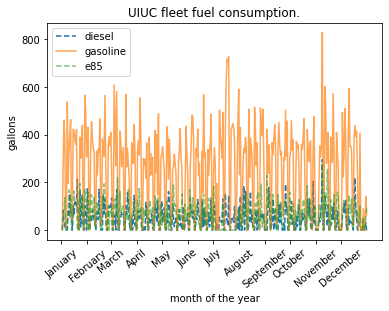

In [4]:
df = pd.read_csv('uiuc.csv')

doy = df['day of the year'].tolist()
unleaded = np.array(df['unleaded (gallons)'].tolist())
h2_unleaded = df['unleaded H2 (kg)'].tolist()
diesel = np.array(df['diesel (gallons)'].tolist())
h2_diesel = df['diesel H2 (kg)'].tolist()
e85 = np.array(df['E85 (gallons)'].tolist())
h2_e85 = df['E85 H2 (kg)'].tolist()

total = unleaded + diesel + e85

plt.plot(doy, diesel, label='diesel', alpha=1.0, linestyle='--')
plt.plot(doy, unleaded, label='gasoline', alpha=0.7)
plt.plot(doy, e85, label='e85', alpha=0.6, linestyle='--')
# plt.plot(doy, total, label='total', alpha=0.6, linestyle='--')
plt.legend(loc='upper left')
plt.ylabel('gallons')

mnumber = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
mname = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
plt.xticks(mnumber, mname, rotation=40)
plt.xlabel('month of the year')

plt.title('UIUC fleet fuel consumption.')
plt.savefig("figures/uiuc", dpi=300, bbox_inches="tight")
plt.show()

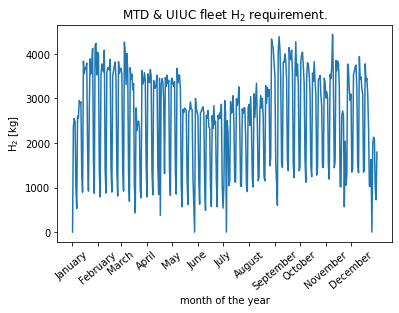

total: 943.1478032000007 tonnes/year
average: 2583.9665841095907 kg/day
average: 107.66527433789962 kg/h
max: 4439.7939 kg/day


In [3]:
df = pd.read_csv('mtd.csv')
h2_mtd = df['h2 (kg)'].tolist()
h2_mtd_diesel = np.roll(h2_mtd, 184)[::-1]

df = pd.read_csv('uiuc.csv')
doy = df['day of the year'].tolist()
h2_unleaded = np.array(df['unleaded H2 (kg)'].tolist())
h2_diesel = np.array(df['diesel H2 (kg)'].tolist())
h2_e85 = np.array(df['E85 H2 (kg)'].tolist())

total_h2 = h2_mtd_diesel + h2_unleaded + h2_diesel + h2_e85
plt.plot(doy, total_h2)
plt.ylabel('H$_2$ [kg]')

mnumber = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
mname = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
plt.xticks(mnumber, mname, rotation=40)
plt.xlabel('month of the year')

plt.title('MTD & UIUC fleet H$_2$ requirement.')
plt.savefig("figures/hydro-fleet", dpi=300, bbox_inches="tight")
plt.show()

totalh2 = sum(total_h2)/1e3
print("total:", totalh2, "tonnes/year")

aveh2 = sum(total_h2)/365
print("average:", aveh2, "kg/day")

aveh2 = sum(total_h2)/365/24
print("average:", aveh2, "kg/h")

maxh2 = max(total_h2)
print("max:", maxh2, "kg/day")

## Microreactors

H2 that each micro reactor could produce with the different methods.


|Reactor        |P [MW$_{th}$]| T$_{o}$[$^\circ$C]|
|---------------|-------------|-------------------|
|MMR (USNC)     | 15          | 640               |
|eVinci (West.) | 5           | 650               |
|ST-OTTO (X-energy) | 30      | 750               |
|U-battery (URENCO) | 10      | 750               |
|Starcore           | 36      | 850               |


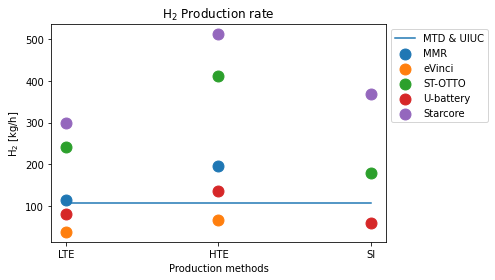

In [4]:
meth = ['LTE', 'HTE', 'SI']
line = aveh2*np.ones(len(meth))

p = 3.5
p *= 9.86923  # MPa -> atm
Ts = 950

reactors = {'mmr': [15, 640, 'MMR'],
            'evi': [5, 650, 'eVinci'],
            'xen': [30, 750, 'ST-OTTO'],
            'uba': [10, 750, 'U-battery'],
            'sta': [36, 850, 'Starcore']
           }

plt.figure()
for key in reactors:
    Pt = reactors[key][0]
    To = reactors[key][1]
    pr = {}
    eta = h2.efficiency(To)
    pr.update({'LTE' : h2.lte_prod_rate(Pt, eta)[0]})
    pr.update({'HTE' : h2.hte_prod_rate(Pt, p, To)[0]})
    if To >= 700/0.97:
        pr.update({'SI' : h2.si_prod_rate(Pt, To)[0]})
    else:
        pr.update({'SI' : None})
    
    plt.scatter(pr.keys(), pr.values(), label='{0}'.format(reactors[key][2]),marker='o', s=120)

plt.plot(meth, line, label='MTD & UIUC')
plt.legend(loc="upper right", bbox_to_anchor=(1.32, 1.0), fancybox=True)
plt.title('H$_2$ Production rate')
plt.ylabel('H$_2$ [kg/h]')
plt.xlabel('Production methods')
plt.savefig("figures/reactors-by-hour1", dpi=300, bbox_inches="tight")



In [ ]:
meth = ['LTE', 'HTE', 'SI', 'SI-2']
line = aveh2*np.ones(len(meth))

p = 3.5
p *= 9.86923  # MPa -> atm
Ts = 950

reactors = {'mmr': [15, 640, 'MMR'],
            'evi': [5, 650, 'eVinci'],
            'xen': [30, 750, 'ST-OTTO'],
            'uba': [10, 750, 'U-battery'],
            'sta': [36, 850, 'Starcore']
           }

plt.figure()
for key in reactors:
    Pt = reactors[key][0]
    To = reactors[key][1]
    pr = {}
    eta = h2.efficiency(To)
    pr.update({'LTE' : h2.lte_prod_rate(Pt, eta)[0]})
    pr.update({'HTE' : h2.hte_prod_rate(Pt, p, To)[0]})
    if To >= 750/0.97:
        pr.update({'SI' : h2.si_prod_rate(Pt, To)[0]})
    else:
        pr.update({'SI' : None})
    pr.update({'SI-2' : h2.si2_prod_rate(Pt, To, Ts)[0]})
    
    plt.scatter(pr.keys(), pr.values(), label='{0}'.format(reactors[key][2]),marker='o', s=120)

plt.plot(meth, line, label='MTD & UIUC')
plt.legend(loc="upper right", bbox_to_anchor=(1.32, 1.0), fancybox=True)
plt.title('H$_2$ Production rate')
plt.ylabel('H$_2$ [kg/h]')
plt.xlabel('Production methods')
plt.savefig("figures/reactors-by-hour2", dpi=300, bbox_inches="tight")